<a href="https://colab.research.google.com/github/rober122pst/apredendo-pandas/blob/main/ATE_DS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff

In [ ]:
path = 'https://ocw.mit.edu/courses/15-071-the-analytics-edge-spring-2017/d4332a3056f44e1a1dec9600a31f21c8_boston.csv'

In [ ]:
boston = pd.read_csv(path)

In [ ]:
boston

,TOWN,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,Nahant,2011,-70.9550,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3
1,Swampscott,2021,-70.9500,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,Swampscott,2022,-70.9360,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,Marblehead,2031,-70.9280,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,Marblehead,2032,-70.9220,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Winthrop,1801,-70.9860,42.2312,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0
502,Winthrop,1802,-70.9910,42.2275,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0
503,Winthrop,1803,-70.9948,42.2260,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0
504,Winthrop,1804,-70.9875,42.2240,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0


In [ ]:
data = pd.DataFrame(data=boston)

In [ ]:
# Correlações
correlacoes = data.corr()

<ipython-input-7-fa7c2499e070>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacoes = data.corr()


<Axes: >

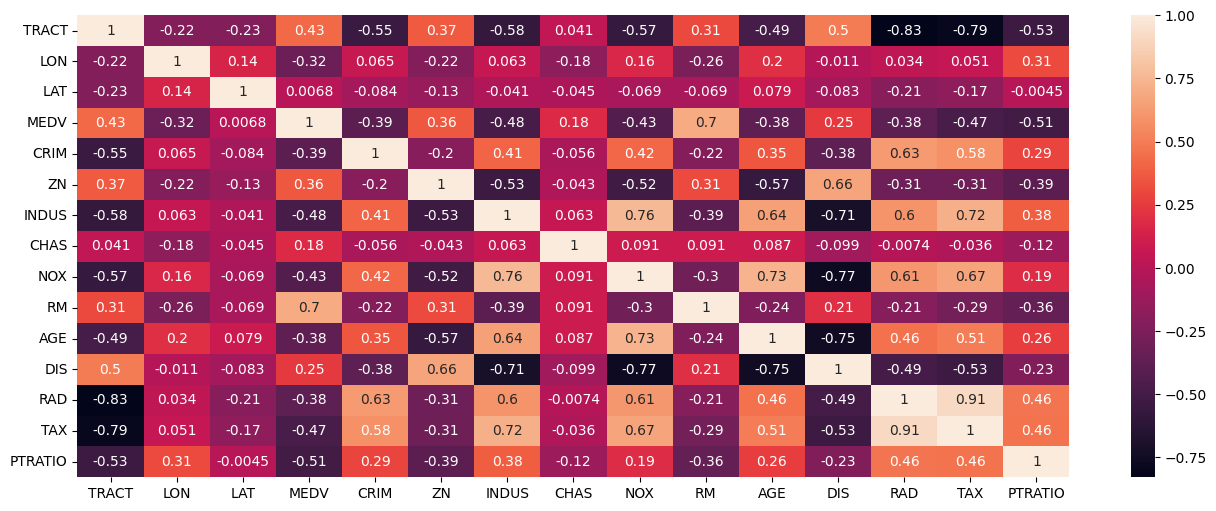

In [ ]:
#Grafico
plt.figure(figsize=(16,6))
sns.heatmap(data=correlacoes, annot=True)

In [ ]:
# RM vs MEDV (Número de quartos e valor médio do imóvel)
fig = px.scatter(data, x=data.RM, y=data.MEDV)
fig.show()

In [ ]:
# PTRATIO vs MEDV (percentual de proporção de alunos para professores)
fig = px.scatter(data, x=data.PTRATIO, y=data.MEDV)
fig.show()

In [ ]:
# estatística descritiva da variável RM
data.RM.describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

In [ ]:
# visualizando a distribuição da variável RM
labels = ['Distribuição da variável RM (número de quartos)']
fig = ff.create_distplot([data.RM], labels, bin_size=.2)
fig.show()

In [ ]:
# Visualizando outliners na variável RM
fig = px.box(data, y='RM')
fig.update_layout(width=800,height=800)
fig.show()

In [ ]:
# Analizando MEDV
data.MEDV.describe()

count    506.000000
mean      22.528854
std        9.182176
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [ ]:
# visualizando distribuição da variável
labels = ['Distribuição da variável MEDV (preço médio do imóvel)']
fig = ff.create_distplot([data.MEDV], labels, bin_size=.2)
fig.show()

In [ ]:
# Carrega o método stats da scipy
from scipy import stats

In [ ]:
# imprime o coeficiente de pearson
stats.skew(data.MEDV)

1.1076159177373188

#Coeficiente de Pearson
- Valor entre -1 e 1 - distribuição simétrica
- Valor maior que 1 - distribuição assimétrica positiva
- Valor menor que -1 - distribuição assimétrica negativa

In [ ]:
# Histogram da variável MEDV (Variavel alvo)
fig = px.histogram(data, x="MEDV", nbins=50, opacity=0.50)
fig.show()

In [ ]:
# Visualizando outliners na variável MEDV
fig = px.box(data, y='MEDV')
fig.update_layout(width=800,height=800)
fig.show()

In [ ]:
data[['RM', 'MEDV', 'PTRATIO']].describe()

,RM,MEDV,PTRATIO
count,506.000000,506.000000,506.000000
mean,6.284634,22.528854,18.455534
std,0.702617,9.182176,2.164946
min,3.561000,5.000000,12.600000
25%,5.885500,17.025000,17.400000
50%,6.208500,21.200000,19.050000
75%,6.623500,25.000000,20.200000
max,8.780000,50.000000,22.000000


# **Analisando** ***MEDV***
- 20 Maiores valores nas variáveis

In [ ]:
data[['RM', 'MEDV', 'PTRATIO']].nlargest(20,'MEDV')
top20 = data.nlargest(20,'MEDV').index
top20
data.drop(top20, inplace=True)

In [ ]:
# imprimindo os 16 maiores valores de MEDV
data[['RM', 'MEDV', 'PTRATIO']].nlargest(16, 'MEDV')

,RM,MEDV,PTRATIO
282,7.645,46.0,14.9
280,7.820,45.4,14.9
224,8.266,44.8,17.4
256,7.454,44.0,15.9
98,7.820,43.8,18.0
268,7.470,43.5,13.0
261,7.520,43.1,13.0
253,8.259,42.8,19.1
202,7.610,42.3,14.7
232,8.337,41.7,17.4


In [ ]:
#  filtrando os top 16 maiores registros da coluna MEDV
top16 = data.nlargest(16, 'MEDV').index

In [ ]:
# remove os valores listados em top16
data.drop(top16, inplace=True)

In [ ]:
# visualizando distribuição da variável MEDV
labels = ['Distribuição da variável MEDV (número de quartos)']
fig = ff.create_distplot([data.MEDV], labels, bin_size=.2)
fig.show()

# Definindo um Baseline
- Uma baseline é importante para ter marcos no projeto.
- Permite uma explicação fácil para todos os envolvidos.
- É algo que sempre tentaremos ganhar na medida do póssivel.

In [ ]:
# converte os dados
data.RM = data.RM.astype(int)

In [ ]:
# imprime o coeficiente de pearson
stats.skew(data.MEDV)

0.1807387457490968

In [ ]:
# estatistica descritiva da coluna de numero de quartos
data.RM.describe()

count    470.000000
mean       5.674468
std        0.667864
min        3.000000
25%        5.000000
50%        6.000000
75%        6.000000
max        8.000000
Name: RM, dtype: float64

In [ ]:
categorias = []

In [ ]:
# alimenta a lista de categorias
for i in data.RM.iteritems():
  valor = (i[1])
  if valor <= 4:
    categorias.append('Pequeno')
  elif valor < 7:
    categorias.append('Médio')
  else:
    categorias.append('Grande')

<ipython-input-30-9736a8dbde39>:2: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [ ]:
# cria a coluna categorias
data['categorias'] = categorias

In [ ]:
# imprime a contagem de categorias
data.categorias.value_counts()

Médio      423
Grande      33
Pequeno     14
Name: categorias, dtype: int64

In [ ]:
# agrupa as categorias e calcula as médias
medias_categorias = data.groupby(by='categorias')['MEDV'].mean()

In [ ]:
# visualizando a variável medias_categorias
medias_categorias

categorias
Grande     31.406061
Médio      20.075650
Pequeno    14.921429
Name: MEDV, dtype: float64

In [ ]:
# criando dicionario com chaves medio, grande e pequeno e seus valores
dic_baseline = {'Grande': medias_categorias[0], 'Medio': medias_categorias[1], 'Pequeno': medias_categorias[2]}

In [ ]:
dic_baseline

{'Grande': 31.40606060606061,
 'Medio': 20.07565011820331,
 'Pequeno': 14.921428571428573}

In [ ]:
# criando a função retorna baseline
def retorna_baseline(num_quartos):
  if num_quartos <- 4:
    return dic_baseline.get('Pequeno')
  elif num_quartos < 7:
    return dic_baseline.get('Medio')
  else:
    return dic_baseline.get('Grande')

In [ ]:
# chama a função retorna baseline
retorna_baseline(3)

20.07565011820331

In [ ]:
for i in data.RM.iteritems():
  n_quartos = i[1]
  print('Número de quartos é: {}, Valor médio: {}'.format(n_quartos, retorna_baseline(n_quartos)))

Número de quartos é: 6, Valor médio: 20.07565011820331
Número de quartos é: 6, Valor médio: 20.07565011820331
Número de quartos é: 7, Valor médio: 31.40606060606061
Número de quartos é: 6, Valor médio: 20.07565011820331
Número de quartos é: 7, Valor médio: 31.40606060606061
Número de quartos é: 6, Valor médio: 20.07565011820331
Número de quartos é: 6, Valor médio: 20.07565011820331
Número de quartos é: 6, Valor médio: 20.07565011820331
Número de quartos é: 5, Valor médio: 20.07565011820331
Número de quartos é: 6, Valor médio: 20.07565011820331
Número de quartos é: 6, Valor médio: 20.07565011820331
Número de quartos é: 6, Valor médio: 20.07565011820331
Número de quartos é: 5, Valor médio: 20.07565011820331
Número de quartos é: 5, Valor médio: 20.07565011820331
Número de quartos é: 6, Valor médio: 20.07565011820331
Número de quartos é: 5, Valor médio: 20.07565011820331
Número de quartos é: 5, Valor médio: 20.07565011820331
Número de quartos é: 5, Valor médio: 20.07565011820331
Número de 

<ipython-input-39-5e941942ed92>:1: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [ ]:
data.head()

,TOWN,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,categorias
0,Nahant,2011,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6,65.2,4.0900,1,296,15.3,Médio
1,Swampscott,2021,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6,78.9,4.9671,2,242,17.8,Médio
2,Swampscott,2022,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7,61.1,4.9671,2,242,17.8,Grande
3,Marblehead,2031,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6,45.8,6.0622,3,222,18.7,Médio
4,Marblehead,2032,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7,54.2,6.0622,3,222,18.7,Grande


# Nova seção

In [ ]:
# Variavel 'y é nossa variável alvo
y = data['MEDV']

In [ ]:
# Remove as colunas colineares, variável alvo e a coluna categorias
x = data.drop(['TOWN','TRACT','LAT','RAD','LON','TAX','MEDV','DIS','AGE','ZN','categorias'], axis=1)

In [ ]:
x.head()

,CRIM,INDUS,CHAS,NOX,RM,PTRATIO
0,0.00632,2.31,0,0.538,6,15.3
1,0.02731,7.07,0,0.469,6,17.8
2,0.02729,7.07,0,0.469,7,17.8
3,0.03237,2.18,0,0.458,6,18.7
4,0.06905,2.18,0,0.458,7,18.7


In [ ]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Divide os dados entre o cojunto de treino e teste, 80% e 20% respectivamente.
# Define qualquer valor para o parametro random_state.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

In [ ]:
# Imprime a quantidade de linhas dos conjuntos
print('X_train: numero de linhas e colunas: {}'.format(X_train.shape))
print('X_test: numero de linhas e colunas: {}'.format(X_test.shape))
print('y_train: numero de linhas e colunas: {}'.format(y_train.shape))
print('y_test: numero de linhas e colunas: {}'.format(y_test.shape))

X_train: numero de linhas e colunas: (376, 6)
X_test: numero de linhas e colunas: (94, 6)
y_train: numero de linhas e colunas: (376,)
y_test: numero de linhas e colunas: (94,)


In [ ]:
X_test.head()

,CRIM,INDUS,CHAS,NOX,RM,PTRATIO
192,0.08664,3.44,0,0.437,7,15.2
471,4.03841,18.10,0,0.532,6,20.2
211,0.37578,10.59,1,0.489,5,18.6
312,0.26169,9.90,0,0.544,6,18.4
460,4.81213,18.10,0,0.713,6,20.2


In [ ]:
# Definindo lista de predições
predicoes = []

In [ ]:
# Para cada elemento do teste, alimenta a lista de predições
for i in X_test.RM.iteritems():
  n_quartos = i[1]
  predicoes.append(retorna_baseline(n_quartos))

<ipython-input-50-524dc8ac7934>:2: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [ ]:
# Imprime as 10 primeiras linhas da lista de predições
predicoes[:10]

[31.40606060606061,
 20.07565011820331,
 20.07565011820331,
 20.07565011820331,
 20.07565011820331,
 20.07565011820331,
 20.07565011820331,
 20.07565011820331,
 20.07565011820331,
 20.07565011820331]

In [ ]:
# cria um data frame vazio
df_results = pd.DataFrame()

In [ ]:
df_results['valor_real'] = y_test.values

In [ ]:
# adiciona a coluna valor_real
df_results['valor_predito_baseline'] = predicoes

In [ ]:
df_results.head(10)

,valor_real,valor_predito_baseline
0,36.4,31.406061
1,19.6,20.075650
2,19.3,20.075650
3,19.4,20.075650
4,16.4,20.075650
5,10.4,20.075650
6,30.1,20.075650
7,25.2,20.075650
8,21.6,20.075650
9,21.4,20.075650


In [ ]:
import plotly.graph_objects as go

#Create Traces
fig = go.Figure()

# Linha com os dados de teste
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_real,
                         mode='lines+markers',
                         name='Valor Real'))

# Linha com os dadospreditos
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_baseline,
                         mode='lines+markers',
                         name='Valor Predito Baseline'))

fig.show()

In [ ]:
# calcula a métrica rmse
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
rmse = (np.sqrt(mean_squared_error(y_test, predicoes)))

In [ ]:
print('Performace do modelo baseline')
print('\nRMSE é: {}'.format(rmse))

Performace do modelo baseline

RMSE é: 5.110437659566612


# Machine Learning

# Regreção Linear
 - Devido a correlação entre algumas features podemos usar uma regreção linear
 - Modelo simples e eficiente.
 - Solução rapida e robusta.

In [ ]:
# carrega o pacote LinearRegression
from sklearn.linear_model import LinearRegression

In [ ]:
# cria o objeto do tipo LinearRegression
lin_model = LinearRegression()

In [ ]:
# treina o algoritimo regressão linear
lin_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# avaliação do modelo nos dados de teste
y_pred = lin_model.predict(X_test)

In [ ]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
print('Performace do modelo avaliado com dados de teste')
print('\nRMSE é: {}'.format(rmse))

Performace do modelo avaliado com dados de teste

RMSE é: 3.99692124972864


In [ ]:
# atribui os resultados no dataframe df_results
df_results['Valor_predito_reg_linear'] = lin_model.predict(X_test)

In [ ]:
df_results.head(10)

,valor_real,valor_predito_baseline,Valor_predito_reg_linear
0,36.4,31.406061,30.543930
1,19.6,20.075650,19.464238
2,19.3,20.075650,23.205432
3,19.4,20.075650,22.554506
4,16.4,20.075650,16.536505
5,10.4,20.075650,3.961189
6,30.1,20.075650,26.255023
7,25.2,20.075650,24.067003
8,21.6,20.075650,22.553297
9,21.4,20.075650,16.440244


In [ ]:
#Create Traces
fig = go.Figure()

# Linha com os dados de teste
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_real,
                         mode='lines+markers',
                         name='Valor Real'))

# Linha com os dados de baseline
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_baseline,
                         mode='lines+markers',
                         name='Valor Predito Baseline'))

# Linha com os dado preditos pela regressão linear
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.Valor_predito_reg_linear,
                         mode='lines',
                         name='Valor Predito Reg Linear'))

fig.show()

# Arvore de decisão
  - Algoritimo de aprendizado supervisionado
  - Explicabilidade do Modelo
  - Simples

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regressor = DecisionTreeRegressor()

In [ ]:
# treina o algoritimo
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# fazendo as previsões
y_pred = regressor.predict(X_test)

In [ ]:
# adiciona o valor do modelo no dataframe
df_results['valor_predito_arvore'] = y_pred
df_results.head(10)

,valor_real,valor_predito_baseline,Valor_predito_reg_linear,valor_predito_arvore
0,36.4,31.406061,30.543930,34.9
1,19.6,20.075650,19.464238,21.2
2,19.3,20.075650,23.205432,23.7
3,19.4,20.075650,22.554506,15.0
4,16.4,20.075650,16.536505,14.1
5,10.4,20.075650,3.961189,13.1
6,30.1,20.075650,26.255023,23.8
7,25.2,20.075650,24.067003,24.5
8,21.6,20.075650,22.553297,15.0
9,21.4,20.075650,16.440244,17.3


In [ ]:
#Create Traces
fig = go.Figure()

# Linha com os dados de teste
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_real,
                         mode='lines+markers',
                         name='Valor Real'))

# Linha com os dados de baseline
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_baseline,
                         mode='lines+markers',
                         name='Valor Predito Baseline'))

# Linha com os dado preditos pela regressão linear
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.Valor_predito_reg_linear,
                         mode='lines',
                         name='Valor Predito Reg Linear'))

# Linha com os dado preditos
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_arvore,
                         mode='lines+markers',
                         name='Valor Predito Arvore'))

fig.show()

In [ ]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

print('Performace do modelo avaliado com dados de teste')
print('\nRMSE é: {}'.format(rmse))

Performace do modelo avaliado com dados de teste

RMSE é: 5.22416643050516


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
# treina o algoritimo
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# avaliação do modelo nos dados de teste
y_pred = rf_regressor.predict(X_test)

In [ ]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

print('Performace do modelo avaliado com dados de teste')
print('\nRMSE é: {}'.format(rmse))

Performace do modelo avaliado com dados de teste

RMSE é: 3.776878344865624


In [ ]:
# adiciona o valor do modelo no dataframe
df_results['valor_predito_random_forest'] = y_pred
df_results.head(10)

,valor_real,valor_predito_baseline,Valor_predito_reg_linear,valor_predito_arvore,valor_predito_random_forest
0,36.4,31.406061,30.543930,34.9,33.726
1,19.6,20.075650,19.464238,21.2,21.457
2,19.3,20.075650,23.205432,23.7,22.008
3,19.4,20.075650,22.554506,15.0,19.671
4,16.4,20.075650,16.536505,14.1,15.669
5,10.4,20.075650,3.961189,13.1,11.468
6,30.1,20.075650,26.255023,23.8,27.713
7,25.2,20.075650,24.067003,24.5,24.725
8,21.6,20.075650,22.553297,15.0,19.936
9,21.4,20.075650,16.440244,17.3,18.132


In [ ]:
#Create Traces
fig = go.Figure()

# Linha com os dados de teste
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_real,
                         mode='markers',
                         name='Valor Real'))

# Linha com os dados de baseline
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_baseline,
                         mode='lines+markers',
                         name='Valor Predito Baseline'))

# Linha com os dado preditos pela regressão linear
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.Valor_predito_reg_linear,
                         mode='lines',
                         name='Valor Predito Reg Linear'))

# Linha com os dado preditos
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_arvore,
                         mode='lines+markers',
                         name='Valor Predito Arvore'))

# Linha com os random forest
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_random_forest,
                         mode='lines+markers',
                         name='Valor Predito Random Forest'))

fig.show()

In [ ]:
x['MEDV'] = y

In [ ]:
x.head()

,CRIM,INDUS,CHAS,NOX,RM,PTRATIO,MEDV
0,0.00632,2.31,0,0.538,6,15.3,24.0
1,0.02731,7.07,0,0.469,6,17.8,21.6
2,0.02729,7.07,0,0.469,7,17.8,34.7
3,0.03237,2.18,0,0.458,6,18.7,33.4
4,0.06905,2.18,0,0.458,7,18.7,36.2


In [ ]:
x.to_csv('data.csv', index=False)